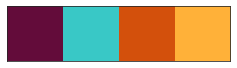

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Import my spotify data
songs = pd.read_csv("mySongsDataset.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18 non-null     object 
 1   artist        18 non-null     object 
 2   id            18 non-null     object 
 3   danceability  18 non-null     float64
 4   energy        18 non-null     float64
 5   loudness      18 non-null     float64
 6   speechiness   18 non-null     float64
 7   acousticness  18 non-null     float64
 8   tempo         18 non-null     float64
 9   liveness      18 non-null     float64
 10  valence       18 non-null     float64
dtypes: float64(8), object(3)
memory usage: 1.7+ KB


In [5]:

songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,もしもまたいつか (Moshimo Mata Itsuka) Feat. Ariel NIDJI,Ariel NOAH,3OVQ4OkklQ0LpIfd7Bl0jI,0.742,-11.917,0.0302,0.6290,0.1520
1,Wait Another Day,Mike Williams,7qZOnik9K8Mv987ccBjwwj,0.727,-3.594,0.0377,0.0272,0.1180
2,Make You Mine (feat. Moa Lisa),Mike Williams,1ICPREUY4yMNeFEgbNh7D5,0.720,-4.975,0.0569,0.0171,0.2150
3,Wait For You (feat. Maia Wright),Mike Williams,0OpfRbSog1yotyMpFVX6K9,0.517,-4.075,0.0398,0.2240,0.0921
4,I Got You,Mike Williams,4QE7rcOeNErdz87pgSZ823,0.597,-3.865,0.0782,0.1140,0.7000


In [6]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.624389,-6.632500,0.047322,0.289544,0.255500
std,0.158468,3.734687,0.024889,0.322921,0.200863
min,0.314000,-14.940000,0.030200,0.002190,0.067800
25%,0.532750,-8.305000,0.034525,0.040250,0.125750
50%,0.673000,-5.036500,0.039650,0.112500,0.179000
75%,0.730750,-4.176500,0.046400,0.559500,0.321000
max,0.859000,-1.928000,0.135000,0.937000,0.700000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0F68DE988>,
      dtype=object)

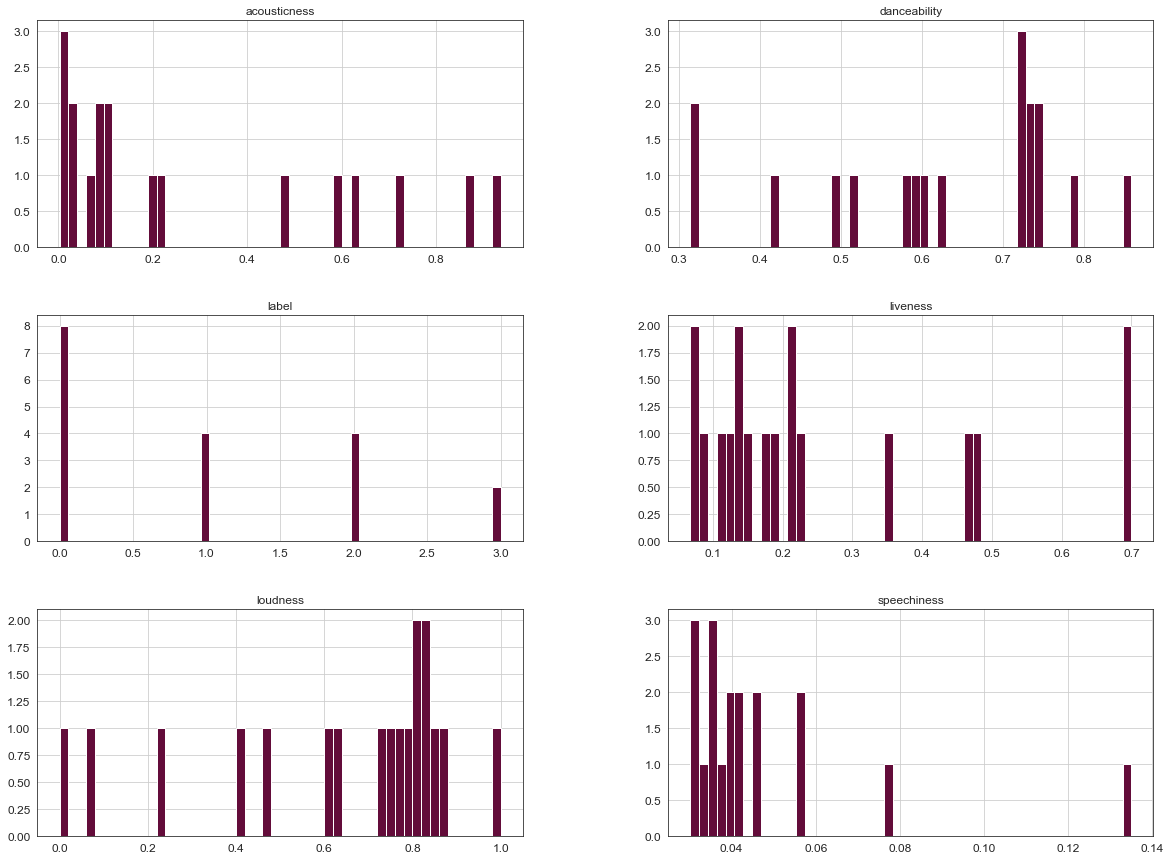

In [45]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [46]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [47]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)



In [48]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [49]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5780788072058197)
For n_clusters = 3, silhouette score is 0.6139423559014145)
For n_clusters = 4, silhouette score is 0.7071928497995414)
For n_clusters = 5, silhouette score is 0.7009235724831613)
For n_clusters = 6, silhouette score is 0.6767051357866737)
For n_clusters = 7, silhouette score is 0.6190072089800915)
For n_clusters = 8, silhouette score is 0.4249046032171623)
For n_clusters = 9, silhouette score is 0.46400583028976183)
For n_clusters = 10, silhouette score is 0.39753762079077715)
For n_clusters = 11, silhouette score is 0.303964845335394)
For n_clusters = 12, silhouette score is 0.275843202232157)
For n_clusters = 13, silhouette score is 0.19265230837738653)
For n_clusters = 14, silhouette score is 0.21374510220692544)


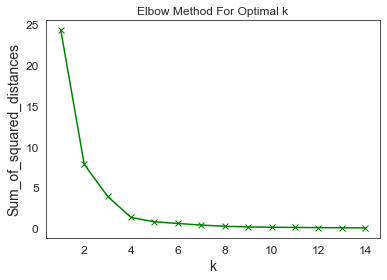

In [50]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


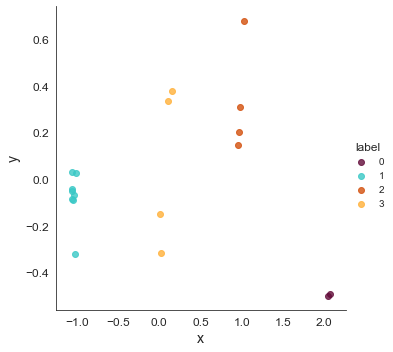

In [53]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [54]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

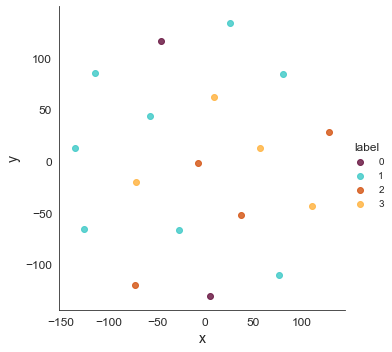

In [55]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [56]:
pca.explained_variance_ratio_

array([0.86845175, 0.06673664])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [57]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness     label
PC-1     -0.062813 -0.100008     0.000624      0.186159  0.075969  0.972433
PC-2      0.214004 -0.760691     0.035892     -0.378807  0.479484 -0.029373


# Next step lets explore each of the 4 clusters and see what songs they contain

In [58]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    8
3    4
2    4
0    2
Name: label, dtype: int64

In [59]:
songs[songs['label'] == 0].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
16,Way Back Home,Funguypiano,2nC7sW1clIqOxZ48DcKrTg,0.317,0.756379,0.0420,0.937,0.188,0
15,As If It's Your Last,Funguypiano,5JQKHB3Bmjhz1GB0kI91Fu,0.314,0.765832,0.0426,0.874,0.134,0


In [60]:
songs[songs['label']==1].head(15)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2,Make You Mine (feat. Moa Lisa),Mike Williams,1ICPREUY4yMNeFEgbNh7D5,0.720,0.871964,0.0569,0.01710,0.2150,1
7,Ko Ko Bop,EXO,5EzitieoPnjyKHAq0gfRMa,0.749,0.831463,0.0468,0.03190,0.0678,1
12,Serenata Jiwa Lara,Diskoria,7ivFVBVYH5akFOtOAyeJ4j,0.608,0.834998,0.0312,0.09520,0.2220,1
1,Wait Another Day,Mike Williams,7qZOnik9K8Mv987ccBjwwj,0.727,0.814402,0.0377,0.02720,0.1180,1
9,Superheroes,The Script,37sINbJZcFdHFAsVNsPq1i,0.491,0.783431,0.0395,0.00219,0.0741,1
3,Wait For You (feat. Maia Wright),Mike Williams,0OpfRbSog1yotyMpFVX6K9,0.517,1.000000,0.0398,0.22400,0.0921,1
10,Hall of Fame (feat. will.i.am),The Script,7wMq5n8mYSKlQIGECKUgTX,0.421,0.615970,0.0565,0.06530,0.1230,1
11,You Know I'll Go Get,DJ Haning,7oQqbE69h5VEU25RZHIZ5p,0.859,0.814172,0.0452,0.00920,0.2080,1


In [61]:
songs[songs['label']==2].head(30)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
4,I Got You,Mike Williams,4QE7rcOeNErdz87pgSZ823,0.597,0.069859,0.0782,0.1140,0.700,2
17,Secukupnya,Hindia,5drW6PGRxkE6MxttzVLNk5,0.731,0.474562,0.0344,0.1900,0.354,2
13,Balada Insan Muda,Diskoria,7rt1ze8gO84v4k9vBvb7JB,0.626,0.414848,0.0364,0.1110,0.472,2
6,LATHI (ꦭꦛꦶ),Weird Genius,7ksK7gpPDFdY4JLHr1hKfY,0.580,0.633646,0.0349,0.0857,0.478,2


In [62]:
songs[songs['label']==3].head(40)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
5,Memori,Eka Gustiwana,266KLge0BPmxLkMqtPhOJZ,0.784,0.727098,0.0322,0.483,0.170,3
8,death bed (coffee for your head) (feat. beabad...,Powfu,7eJMfftS33KTjuF7lTsMCx,0.726,0.232324,0.1350,0.731,0.696,3
0,もしもまたいつか (Moshimo Mata Itsuka) Feat. Ariel NIDJI,Ariel NOAH,3OVQ4OkklQ0LpIfd7Bl0jI,0.742,0.851137,0.0302,0.629,0.152,3
14,Bentuk Cinta,Eclat Story,4J12uL4aNKzRco173fPyYQ,0.730,0.000000,0.0323,0.585,0.135,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0F6E46CC8>,
      dtype=object)

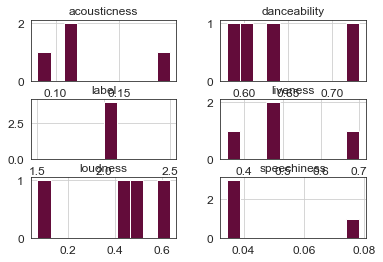

In [63]:
songs[songs['label']==2].hist()

In [64]:
songs[songs['label']==3].mean()

danceability    0.745500
loudness        0.452640
speechiness     0.057425
acousticness    0.607000
liveness        0.288250
label           3.000000
dtype: float64

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [67]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[3 0 1]
 [0 1 0]
 [0 0 1]]


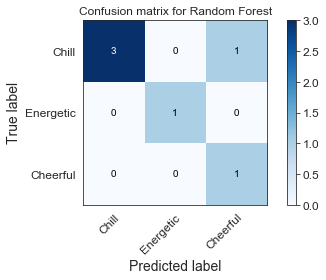

In [30]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [31]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.1350568273579858),
 ('loudness', 0.30668540719016385),
 ('speechiness', 0.08065903630965682),
 ('acousticness', 0.321971488647252),
 ('liveness', 0.15562724049494164)]

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[3 0 1]
 [0 1 0]
 [0 0 1]]


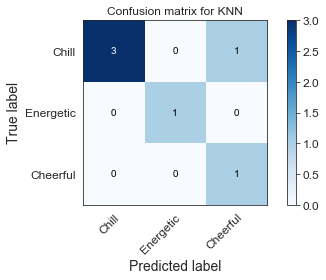

In [34]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [35]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[4 0 0]
 [0 1 0]
 [1 0 0]]


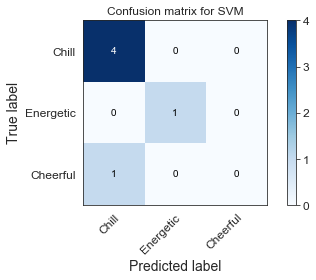

In [36]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\bayuw\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[4 0 0]
 [0 1 0]
 [0 0 1]]


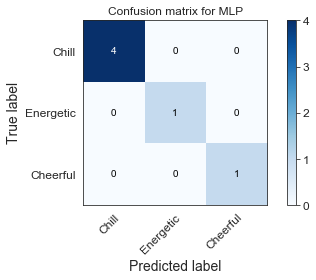

In [40]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [41]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [42]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [43]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [44]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter